# kNN Clustering 

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import  KFold, train_test_split, cross_val_predict

import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

df       = pd.read_csv("Financial_Mexican_Firms.csv")

1. Train & Test Split

In [2]:
X  = df.iloc[:, 0:10]
y  = df.iloc[:, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0) 
df_train = pd.concat([X_train, y_train], axis = 1)
df_test  = pd.concat([X_test, y_test], axis = 1)

2. Handling missing values 

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Imputation techniques
iregression_imputer = IterativeImputer(estimator = LinearRegression(), 
                                   missing_values = np.nan, 
                                   max_iter = 5, 
                                   imputation_order = 'roman', 
                                   random_state = 0)

# Apply an Imputation technique for training & testing datasets and rename columns
df_train  = pd.DataFrame(iregression_imputer.fit_transform(df_train), columns = ['ProposedIndex', 
                                                                 'IIHH',  
                                                                 'Shannon',
                                                                 'Size',
                                                                 'AssetTurnover',
                                                                 'Debt',
                                                                 'QuickRatio',
                                                                 'CashHoldings',
                                                                 'ROE',
                                                                 'ROI',
                                                                 'ROA'])

df_test  = pd.DataFrame(iregression_imputer.fit_transform(df_test), columns = ['ProposedIndex', 
                                                                 'IIHH',  
                                                                 'Shannon',
                                                                 'Size',
                                                                 'AssetTurnover',
                                                                 'Debt',
                                                                 'QuickRatio',
                                                                 'CashHoldings',
                                                                 'ROE',
                                                                 'ROI', 
                                                                 'ROA'])

# Update the training set
X_train  = df_train.iloc[:,:-1]
y_train  = df_train.ROA

X_test  = df_test.iloc[:,:-1]
y_test  = df_test.ROA

3. Feature Scaling 

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_scaler = StandardScaler()
mmx_scaler = MinMaxScaler()
rob_scaler = RobustScaler()

X_train = pd.DataFrame(rob_scaler.fit_transform(X_train), columns = ['ProposedIndex', 
                                                                 'IIHH',  
                                                                 'Shannon',
                                                                 'Size',
                                                                 'AssetTurnover',
                                                                 'Debt',
                                                                 'QuickRatio',
                                                                 'CashHoldings',
                                                                 'ROE',
                                                                 'ROI'])

X_test = pd.DataFrame(rob_scaler.transform(X_test), columns = ['ProposedIndex', 
                                                                 'IIHH',  
                                                                 'Shannon',
                                                                 'Size',
                                                                 'AssetTurnover',
                                                                 'Debt',
                                                                 'QuickRatio',
                                                                 'CashHoldings',
                                                                 'ROE',
                                                                 'ROI'])
# Update scaled datasets
df_train = pd.concat([X_train, y_train], axis = 1)     
df_test  = pd.concat([X_test, y_test], axis = 1)  

4. Hyperparameter Tunning (Choose K)

In [5]:
error_rate = []
for i in range (1, 50):
    knn      = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    y_pred_k = cross_val_predict(knn, X_train, y_train, cv = 10, n_jobs = -1)
    error_rate.append(1 - y_pred_k.mean())   

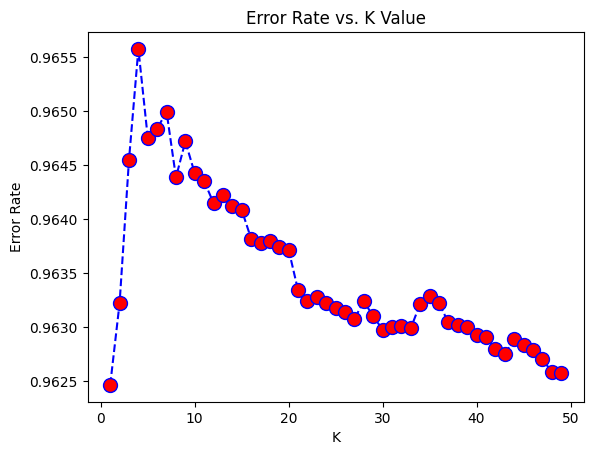

In [6]:
plt.plot(range(1,50), 
            error_rate, 
            color='blue', 
            linestyle='dashed', 
            marker='o',
            markerfacecolor='red', 
            markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

5. Specify the model

In [7]:
kNN_model  = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)


6. Evaluate Performance

In [8]:
import time
start_time = time.time()

y_pred     = kNN_model.predict(X_test)
    
print('R2  :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Processing time: %s seconds' % round((time.time() - start_time), 4))

R2  : 0.6629016480532035
MAE : 0.02340851851851852
MSE : 0.0014550283629629632
RMSE: 0.038144834027204304
Processing time: 0.004 seconds
